# Overview
1. Null Hypothesis Significance Testing (Frequentist)
    * Basic ingredients
    * Type of errors
    * Some common NHST tests
        - z-tests
        - t-tests
2. Bayesian Statistics
    * Bayes' Theorem
    * Bayesian updating
        - with discrete data and discrete prior
        - with discrete data and continuous prior
        - with continuous data and continuous prior
    * Conjugate prior
    * Posterior sampling
        - MCMC algorithm 
        - PyMC3
3. Difference between the two schools of statistics

# 1. Null Hypothesis Significance Testing (NHST)

**Question** A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of the drug, subjecting each to neurological stimulus, and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats' response time is 1.05 seconds with a sample standard deviation of 0.5 seconds. Do you think that the drug has an effect on response time? 

* How to design a NHST to answer this question?
* What kind of test will you pick (z-test or t-test)? why?

## 1.1 NHST Basic Ingredients 


* Null hypothesis ($H_0$): This is the default assumption for the model generating the
data.
* Alternative hypothesis ($H_A$) : the alternative hypothesis. If we reject the null hypothesis we accept this alternative as the best explanation for the data.
* $X$: the test statistic. We compute this from the data.
* Null distribution: the probability distribution of $X$ assuming $H_0$.
* Rejection region (determined by the significance level): if $X$ is in the rejection region we reject $H_0$ in favor of $H_A$.
* Acceptance region: the complement to the rejection region. 

<img src ="./null_dist.png" width = 600>

Let's use an example to understand these ingredients:

**Example 1** Coin Flip

To test whether a coin is fair, we flip it 10 times. Design a NHST for this experiment. 

Let $\theta$ be the probability the coin lands heads when flipped. 

* Null hypothesis ($H_0$): $H_0=$  'the coin is fair', i.e. $\theta=.5$.
* Alternative hypothesis ($H_A$) : $H_A=$ 'the coin is not fair', i.e. $\theta\neq.5$.
* Test statistic: $X=$ number of heads in 10 flips.
* Null distribution: $p(x|\theta=.5)\sim \text{binomial}(10,.5)$.
The probability table for the null distribution is:


|$\qquad x \qquad$|0|1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|-|
|$p(x|H_0)$|.001|.010|.044|.117|.205|.246|.205|.117|.044|.010|.001|

* Rejection region: $X = \{0,1,2,8,9,10\}$
* Acceptance region: the complement to the rejection region. 

Depending on whether the distribution of the hypothesis can be fully specified, hypotheses can be categorized into simple and composite hypotheses. In the above coin flipping example, the null hypothesis is a simple hypothesis and the alternative hypothesis is a composite. It is a good practice to set a simple hypothesis for the null. 

## 1.2 Types of error

<img src = "type_error.png" width = 600>
* Type I error: false rejection of $H_0$
* Type II error: false acceptance of $H_0$

* ***Significance level*** ($\alpha$) = *P*(type I error) ----The probability of mistakenly claiming something interesting has occured 

* ***Power*** = 1- *P*(type II error)=1-$\beta$ ----The probability of detecting something when it's present

e.g. The U.S. criminal defendents are presumed innocent until proven guilty beyond a reasonable doubt.

* $H_0:$ the defendent is innocent (the default)
* $H_A:$ the defendent is guilty.

The ***significance level*** here is the probability of finding an innocent person guilty, which we hope to keep at a very minimal level. The ***power*** is correctly finding a guilty person guilty.  


**Relationship between Type I and Type II errors and Precision, Recall in Machine Learning**


$\text{Precision} = \frac{\text{True Positives}}{\text{Total number of predicted positives}}=\frac{\text{TP}}{\text{TP + FP}}$


$\text{Recall} = \frac{\text{True Positives}}{\text{Total number of actual positives}}=\frac{\text{TP}}{\text{TP + FN}}$


$F_1 = \frac{2 \cdot \text{precision}\cdot \text{recall}}{\text{precision}+ \text{recall}} = \frac{2\text{TP}}{2\text{TP}+\text{FP}+\text{FN}}$ 




There is no direct conversion between the values of Type I and Type II errors to Precision and Recall, because these are usually used in different context. Type I and Type II errors usually occur in NHST under the Frequentist school of statistics, while Precision and Recall (as well as F scores) are used as metrics to measure the performace of machine learning algorithms.With that being said, they use similar confusion matrix and the idea of True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN) are the same. One example of confusion matrix for calculating precision recall is shown below. 

We have 165 patients and we are using a machine learning algorithm to decide whether they have cancer based on the CT scan
<img src ="./confusion_matrix_simple2.png", width = 200>

In this case, $$\text{precision} =\frac{\text{TP}}{\text{TP + FP}}=\frac{100}{100+10}=\frac{10}{11}$$

$$\text{recall} =\frac{\text{TP}}{\text{TP + FN}}= \frac{100}{100+5}=\frac{20}{21}$$

## 1.3 Some commonly used NHST

### 1.3.1 z-test
Caution: the assumption for z-test, t-tests and many other significant tests is that data are drawn from a normal distribution. So, check for normality before applying the t-tests! 
* Use: compare the data mean to a hypothesized mean.
* Data: we assume $x_1,x_2,...,x_n \sim N(\mu,\sigma^2)$, **where $\mu$ is unknown and $\sigma$ is known**
* Null hypothesis: $\mu=\mu_0$ for some specific value $\mu_0$
* Test statistic: $$z=\frac{\bar x-\mu_0}{\sigma/\sqrt{n}} = \text{standardized mean}$$
* Null distribution: $f(z|H_0)$ is the pdf of $Z\sim N(0,1)$
* p-values 
 - One sided p-value (right side): $p=P(Z>z|H_0)$
 - One sided p-value (left side): $p=P(Z<z|H_0)$
 - Two sided p-value: $p=P(|Z|>|z|)$
  

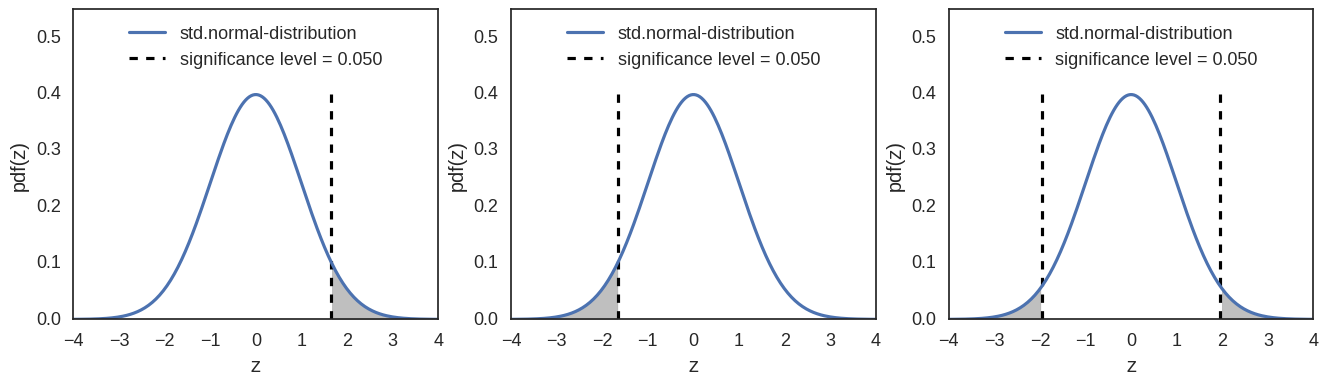

In [161]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(16, 4))
x = np.linspace(-4, 4, 200)
norm_dist = stats.norm.pdf(x)
ax1.plot(x, norm_dist, label='std.normal-distribution')
alpha_right = 0.95 
ax1.vlines(norm.ppf(alpha_right), 0, 0.4, linestyles='--', color='k', 
          label='significance level = {:.3f}'.format(0.05))
ax1.set_ylabel('pdf(z)')
ax1.set_xlabel('z')
ax1.set_ylim(0, 0.55)
ax1.legend(loc=9)
ax1.fill_between(x, 0, norm_dist, where=(x >= norm.ppf(alpha_right)), color='grey', alpha=0.5)


ax2.plot(x, norm_dist, label='std.normal-distribution')
alpha_left = 0.05 
ax2.vlines(norm.ppf(alpha_left), 0, 0.4, linestyles='--', color='k', 
          label='significance level = {:.3f}'.format(0.05))
ax2.set_ylabel('pdf(z)')
ax2.set_xlabel('z')
ax2.set_ylim(0, 0.55)
ax2.legend(loc=9)
ax2.fill_between(x, 0, norm_dist, where=(x <= norm.ppf(alpha_left)), color='grey', alpha=0.5)

ax3.plot(x, norm_dist, label='std.normal-distribution')
alpha_two_tail_left = 0.025 
alpha_two_tail_right = 0.975 

ax3.vlines(norm.ppf(alpha_two_tail_left), 0, 0.4, linestyles='--', color='k', 
          label='significance level = {:.3f}'.format(0.05))
ax3.set_ylabel('pdf(z)')
ax3.set_xlabel('z')
ax3.set_ylim(0, 0.55)

ax3.fill_between(x, 0, norm_dist, where=(x <= norm.ppf(alpha_two_tail_left)), color='grey', alpha=0.5)

ax3.vlines(norm.ppf(alpha_two_tail_right), 0, 0.4, linestyles='--', color='k')
ax3.fill_between(x, 0, norm_dist, where=(x >= norm.ppf(alpha_two_tail_right)), color='grey', alpha=0.5)
ax3.legend(loc=9)

### 1.3.2 t-tests 
Caution: the assumption for z-test, t-tests and many other significant tests is that data are drawn from a normal distribution. So, check for normality before applying the t-tests! 

**One sample t-test of the mean**
* Use: compare the data mean to a hypothesized mean. 
* Data: we assume $x_1,x_2,...,x_n \sim N(\mu,\sigma^2)$, **where both $\mu$ and $\sigma$ are unknown**
* Null hypothesis: $\mu=\mu_0$ for some specific value $\mu_0$
* Test statistic: $$t=\frac{\bar x-\mu_0}{s/\sqrt{n}} = \text{studentized mean}$$ where $$s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i-\bar x)^2$$
* Null distribution: $f(t|H_0)$ is the pdf of $t\sim T(n-1)$, the $t$ distribution with n-1 degrees of freedom.
* p-values
 - One sided p-value (right side): $p=P(T>t|H_0)$
 - One sided p-value (left side): $p=P(T<t|H_0)$
 - Two sided p-value: $p=P(|T|>|t|)$

**Two sample t-test for comparing means (assuming equal variance)**
* Use: compare the data means from two groups
* Data: we assume $x_1,x_2,...,x_n \sim N(\mu_x,\sigma^2)$, and $y_1,y_2,...,y_n \sim N(\mu_y,\sigma^2)$ are two groups of independent data drawn from normal distributions, where both $\mu_x$ and $\mu_y$ are unknown and possibly different. The variance $\sigma^2$ is unknown, but the same for both groups. 
* Null hypothesis: $\mu_x=\mu_y$ 
* Test statistic: $$t=\frac{\bar x-\bar y}{s_p} $$ where $s_x^2$ and $s_y^2$ are sample variances, $s_p^2$ is the pooled sample variance and, $$s_p^2 = \frac{(n-1)s_x^2+(m-1)s_y^2}{n+m-2}(\frac{1}{n}+\frac{1}{m})$$

* Null distribution: $f(t|H_0)$ is the pdf of $t\sim T(n+m-2)$.
* p-values
 - One sided p-value (right side): $p=P(T>t)$
 - One sided p-value (left side): $p=P(T<t)$
 - Two sided p-value: $p=P(|T|>|t|)$

Now, let's solve the problem posed at the beginning. 

**Example 2** A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of the drug, subjecting each to neurological stimulus, and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats' response time is 1.05 seconds with a sample standard deviation of 0.5 seconds. Do you think that the drug has an effect on response time?


Now, we know that we need to solve it using t-test, because the population standard deviation is unknown (we cannot use z-test). We can write the formulation of the NHST as follows:
1. $H_0:\mu=\mu_0 = 1.2$
2. Test statistic: $$t=\frac{\bar x-\mu_0}{s/\sqrt{n}} =\frac{1.05-1.2}{0.5/100}=-3 $$
3. Null distribution: $f(t|H_0)$ is the pdf of $t\sim T(n-1)$, the $t$ distribution with n-1 degrees of freedom.
4. p-value (one sided p-value, left side). See the cell below for calculation ($p=0.0075$). 
5. If we set the significance level ($\alpha$) at 0.05, $p<\alpha$, we can safely reject the null hypothesis and conclude that the drug has some effect on the response time of the rats. 

In [52]:
pval = stdtr(9,-3) #student t distribution cdf (dof, t-statistic)
print(pval) 

0.00747818195521


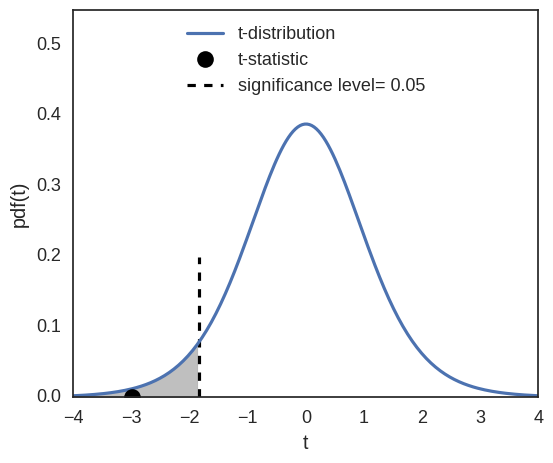

In [160]:
t=-3
df = 9
alpha = 0.05
fig, ax = plt.subplots(figsize=(6,5))
x = np.linspace(-4, 4, 200)
t_dist = stats.t.pdf(x, df)
ax.plot(x, t_dist, label='t-distribution')

ax.plot([t],[0],'o',color='k',markersize=12,label='t-statistic')

ax.vlines(stats.t.ppf(0.05,9), 0, 0.2, linestyles='--', color='k', 
          label='significance level= 0.05')
ax.set_ylabel('pdf(t)')
ax.set_xlabel('t')
ax.set_ylim(0, 0.55)
ax.legend(loc=9)
ax.fill_between(x, 0, t_dist, where=(x <= stats.t.ppf(0.05,9)), color='grey', alpha=0.5)

**Example 3** One sample t-test using python (ttest_1samp)

In [55]:
from scipy import stats
# 1-sample t-testfrom scipy import stats
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
one_sample = stats.ttest_1samp(one_sample_data, 175.3)
print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 2.296 and the p-value is 0.047.


**Example 4** Two sample t-test of means using python (ttest_ind)

ttest_ind:            t = 0.827353  p = 0.410398
ttest_ind_from_stats: t = 0.827353  p = 0.410398
formula:              t = 0.827353  p = 0.410398


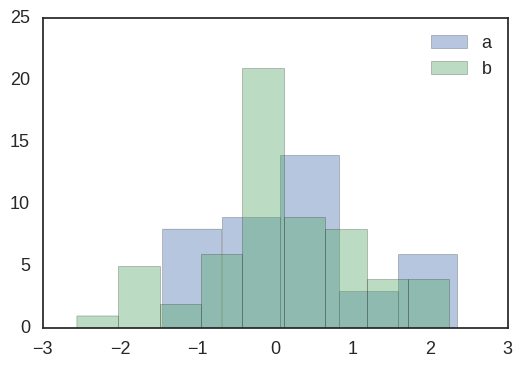

In [84]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(200)

# Create sample data.
a = np.random.randn(40)
b = np.random.randn(60)

ax = plt.subplot()
sns.distplot(a, kde = False, ax=ax, label='a')
sns.distplot(b, kde = False, ax=ax, label='b')
plt.legend()


# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

# Compute the descriptive statistics of a and b.
abar = a.mean()
avar = a.var(ddof=1)
na = a.size
adof = na - 1

bbar = b.mean()
bvar = b.var(ddof=1)
nb = b.size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))


** Note: For two groups data with different population variance, we should use Welch's t-test. In the ttest_ind function, set equal_var to be false.**

**Example 5** Paired t-test (ttest_rel)

Examples for the use are scores of the same set of student in different exams. The test measures whether the average score differs significantly across samples (e.g. exams). 

ttest_ind:            t = -6.80318  p = 2.93929e-11


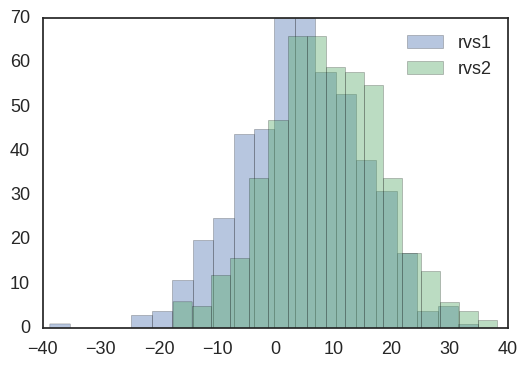

In [77]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=8,scale=10,size=500) + stats.norm.rvs(scale=0.2,size=500))
t1,p1 = stats.ttest_rel(rvs1,rvs2)
print("ttest_ind:            t = %g  p = %g" % (t1, p1))
%matplotlib inline 
import matplotlib.pyplot as plt

ax = plt.subplot()
sns.distplot(rvs1, kde = False, ax=ax,label='rvs1')
sns.distplot(rvs2, kde = False, ax=ax,label='rvs2')
plt.legend()


For other available NHST functions in python (e.g. ANOVA, chisquare), please refer to [python stats library documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) 

# 2. Introduction to Bayesian Statistics

If *H* and *D* are events, then **Bayes' theorem** says
$$P(H\, |\, D) =\frac{P(D\, |\, H)P(H)}{P(D)}$$

In the Bayesian world,
$$P(\text{hypothesis is true | data}) =\frac{P(\text{data | hypothesis is true})P(\text{hypothesis is true})}{P(\text{data})}= \frac{\text{likelihood * prior}}{\text{total probability}}=\text{posterior}$$

**Example 6 ** Coin Flip (source: MIT OCW 18.05)

There are three types of coins which have different probabilities of landing
heads when tossed.

* Type A coins are fair, with probability .5 of heads
* Type B coins are bent and have probability .6 of heads
* Type C coins are bent and have probability .9 of heads

Suppose I have a drawer containing 4 coins: 2 of type A, 1 of type B, and 1 of type C. I
reach into the drawer and pick a coin at random. Without showing you the coin I flip it
once and get heads. What is the probability it is type A? Type B? Type C?

-------
Let A, B, and C be the event that the chosen coin was type A, type B, and type
C. Let D be the event that the toss is heads. The problem asks us to find
P(A|D), P(B|D), P(C|D).
Before applying Bayes theorem, let’s introduce some **terminology**: 
*	 **Experiment**: pick a coin from the drawer at random, flip it, and record the result.
*	 **Data**: the result of our experiment. In this case the event D = ‘heads’. We think of D as data that provides evidence for or against each hypothesis.
*	 **Hypotheses**: we are testing three hypotheses: the coin is type A, B or C.
*	 **Prior probability**: the probability of each hypothesis prior to tossing the coin (collecting data). Since the drawer has 2 coins of type A and 1 each of type B and C we have 

                P(A) = .5, P(B) = .25, P(C) = .25.
*	 **Likelihood**: The likelihood function is P(D|H), i.e., the probability of the data assuming that the hypothesis is true. Most often we will consider the data as fixed and let the hypothesis vary. For example, P(D|A) = probability of heads if the coin is type A. In our case the likelihoods are 

                P(D|A) = .5, P(D|B) = .6, P(D|C) = .9.
*	 **Posterior probability**: After (posterior to) tossing the coin we use Bayes theorem to compute the probability of each hypothesis given the data. These posterior probabilities are what the problem asks us to find. It will turn out that 
    
                P(A|D) = .4, P(B|D) = .24, P(C|D) = .36.

## 2.1 Bayesian updating with discrete priors:
The process of going from the prior probability P(H) to the posterior probability P(H|D) of hypothesis is called Bayesian updating. The above example on coin flipping is based on discrete priors, since the prior probabilities are discrete values. The following table illustrates the math on Bayesian updating.

Bayesian updating table:

<img src="./discrete_prior.png" width=500 height=500/>

#### Updating again and again

When you flip the previously picked coin again and record the result, you get one more data point for this experiment. To get an updated hypthesis given new data, the previous posterious becomes the prior in the new updating table. As we collect more and more good data, we will be getting closer and closer to the truth. Truth, in this case, would be whether the coin you picked was Type A, Type B or Type C.  

Bayesian inference is simply updating your beliefs after considering new evidence. 


### Bayesian updating: probabilistic prediction
In the above example, we looked at updating the probability of hypotheses based on data. We can also use the data to update the probability of each possible outcome of a future experiment. In other words, we can predict what is the probability of getting heads or tails if we flip the chosen coin again. Let's see how this can be done.

** Prior predictive probabilities:** The probability of getting heads or tails based on the priors  

<img src="./prior_pred_prob.png" width=500 height=500 /> 

**Posterior predictive probabilities:** The probability of getting heads or tails based on the posteriors:

<img src="./posterior_pred_prob.png" width=600 height=600/> 

Now, we can see that after getting a head in one flip, the probaility of getting another head in the next flip increases from .625 to .668. This is how data change the predictive probability. 

**Note:** Prior and posterior probabilities are for hypotheses. Prior predictive and
posterior predictive probabilities are for data. 

## 2.2 Bayesian updating with continuous prior

What if the prior probilities of the hypmotheses are continuous in range [a,b] rather than discrete? In this case, we need a prior probability density function, or pdf, $f(\theta)$ which gives a probability density at each hypothesis $\theta$. 

<img src="./conti_prior.png" width=600 height=600/>

**prior pdf:** $f(\theta)$

**posterior pdf:** $f(\theta|x) = \frac{1}{T}p(x|\theta)f(\theta)$

**prior predictive probability:** $\int_{a}^{b}p(x|\theta)f(\theta)d\theta$


**posterior predictive probability** $\int_{a}^{b}p(x_2|\theta)f(\theta|x_1)d\theta$



## 2.3 Bayesian updating with continuous prior and continuous data

The above discussion focuses on discrete data. But sometimes, the data we get follows some proability distribution. The following Bayesian updating table is used for this kind of data

<img src ="./conti_prior_data.png" height=700 width=700 />



** Example 7** Continuous data and continuous prior (source: MIT OCW 18.05)

Suppose we have likelihood function $x \sim N(\theta,5)$ and prior $\theta \sim N(4,8)$. Suppose also that we have one measurement $x_1 = 3$. Show the posterior distribution
is normal.

<img src ="./example2.png" width = 600/>



## 2.4 Conjugate priors
In Bayesian probability theory, if the posterior distributions $p(\theta|x)$ are in the same family as the prior probability distribution $p(\theta)$, the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function. Conjugate priors are useful because they reduce Bayesian
updating to modifying the parameters of the prior distribution (so-called hyperparameters) rather than computing integrals. 

Example 7 shows that the normal distribution is its own conjugate prior. Another important distribution, Beta distribution is a conjugate prior for Bernoulli, binomial, or geometric likelihood. For a complete list of conjugate priors, see [wikipedia post](https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-raiffa_schlaifer-1)

There are established rules for updating the hyperparameters of prior distribution to get the posterior distributions. Let's see one example for normal distribution. 

Suppose we have a measurement $x \sim N(\theta, \sigma^2)$ where the variance $\sigma^2$ is known. That is, the mean $\theta$ is our unknown parameter of interest and we are given that the likelihood comes from a normal distribution with variance $\sigma^2$. If we choose a normal prior pdf 
$$f(\theta)\sim N(\mu_{\text{prior}},\sigma^2)$$

then the posterior pdf is also normal: $f(\theta|x)\sim N(\mu_{\text{post}},\sigma_{\text{post}}^2)$, where

$$\frac{\mu_{\text{post}}}{\sigma_{\text{post}}^2}=\frac{\mu_{\text{prior}}}{\sigma_{\text{prior}}^2}+\frac{x}{\sigma^2},\quad
\frac{1}{\sigma_{\text{post}}^2}=\frac{1}{\sigma_{\text{prior}}^2}+\frac{1}{\sigma^2}$$


So, for example 7, the posterior distribution will be $\mu_{\text{post}}=3.38$ and $\sigma_{\text{post}}^2=3.08$

Let's visualize the changes from prior distribution to posterior distribution given the data: 

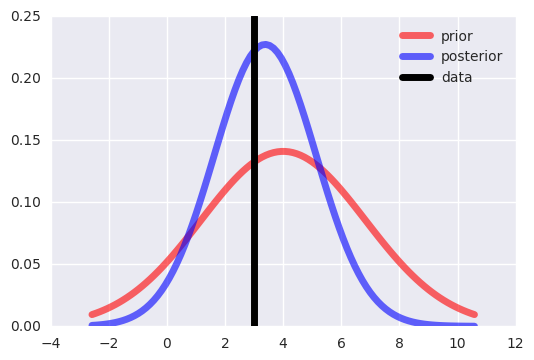

In [59]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1)
x = np.linspace(norm.ppf(0.01,loc=4, scale=np.sqrt(8)),norm.ppf(0.99,loc=4, scale=np.sqrt(8)),100)
ax.plot(x,norm.pdf(x,loc=4, scale=np.sqrt(8)),'r-',lw=5,alpha=0.6,label= 'prior')
ax.plot(x,norm.pdf(x,loc=3.38, scale=np.sqrt(3.08)),'b-',lw=5,alpha=0.6,label= 'posterior')
plt.axvline(x=3,lw=5,label='data',color='k')
plt.legend()

The data drags the distribution more towards it and the distribution is narrower, indicating more confidence in prediction than the prior distribution.

## 2.5 Posterior sampling
**Motivation: **

In the preivous example, we derived a closed form posterior distribution based on the nice conjugate nature of the prior and likelihood distribution. However, in many cases, there is no closed form solution. So we will have to integrate the denominator term $P(D)$ in order to get the posterior distribution. If there are a lot of parameters, that means multi-dimensional integration, which is numerically challenging. We can get around that by posterior sampling. 

The general idea is that we don't need to know the exact form of the posterior distribution. Maybe some statistics of the distribution (mean, variance, etc) would be good enough. So, if we can get samples that are exactly taken from the posterior distribution, we can get what we need. Posterior sampling is a group of methods that allow us to do that. 


** Example 8 ** Posterior sampling using the MCMC method (source: [MCMC sampling for dummies](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/))

We have 20 data points that we know are sampled from a normal distribution with a known variance of 1. We want to infer the mean based on the data. With Bayesian statistics, we need to assume a prior to start with. Here, we assume that the prior is a standard normal distribution. 
Therefore, the prior is $f(\mu) \sim N(0,1)$
and the likelihood is $p(x|\mu) \sim N(\mu,1)$


This example is similar to example 7, and we know that there is an analytical posterior since normal distribution is a conjugate prior to itself. The derivation of the analytical solution can be found [here](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxiYXllc2VjdHxneDplNGY0MDljNDA5MGYxYTM). 

In this example, we will use posterior sampling to get the posterior distribution (assuming we don't know the anlytical posterior) and compare it with the analytical posterior. 

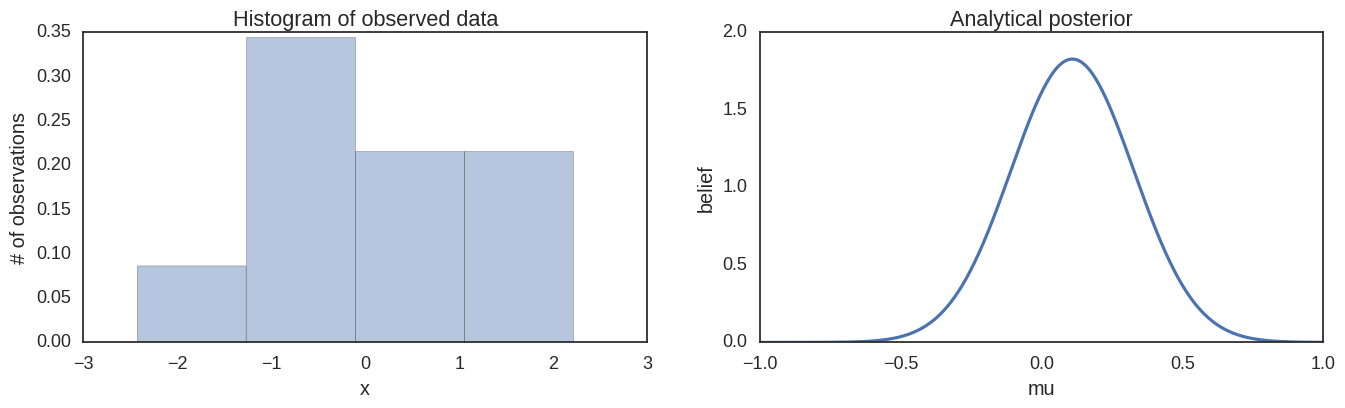

In [138]:
# generate sample data 
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)
data = np.random.randn(20)
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16,4))
sns.distplot(data, kde = False, ax=ax1,norm_hist=True)
_ = ax1.set(title = 'Histogram of observed data',xlabel = 'x', ylabel = '# of observations')
# calculate analytical solution
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax2.plot(x, posterior_analytical,label='Analytical posterior')
ax2.set(xlabel='mu', ylabel='belief', title='Analytical posterior');

In [10]:
# posterior sampling using MCMC
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal? This step eliminates the need for the denominator, which is difficult to compute
        p_accept = p_proposal / p_current
        
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()

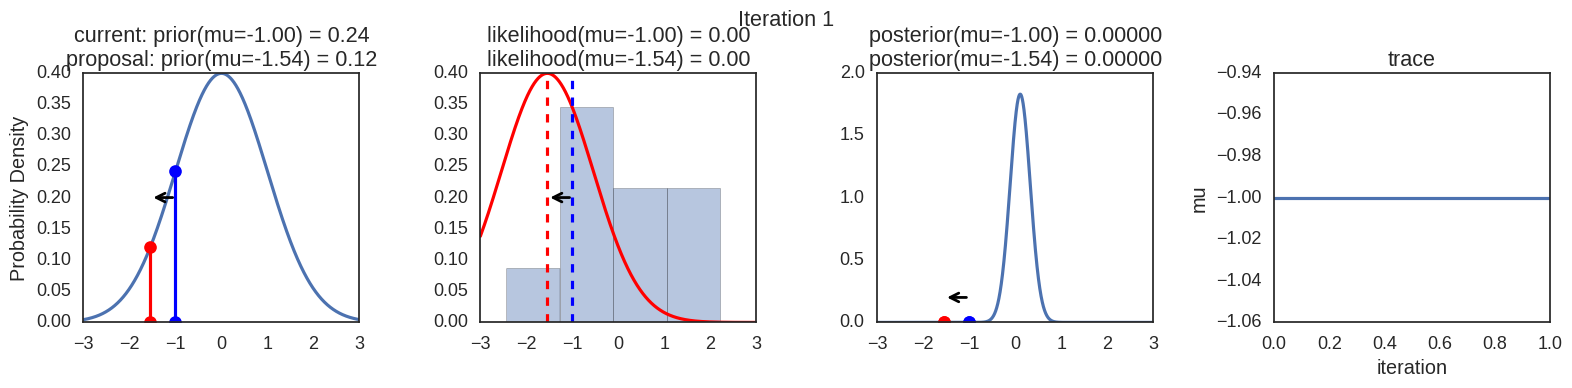

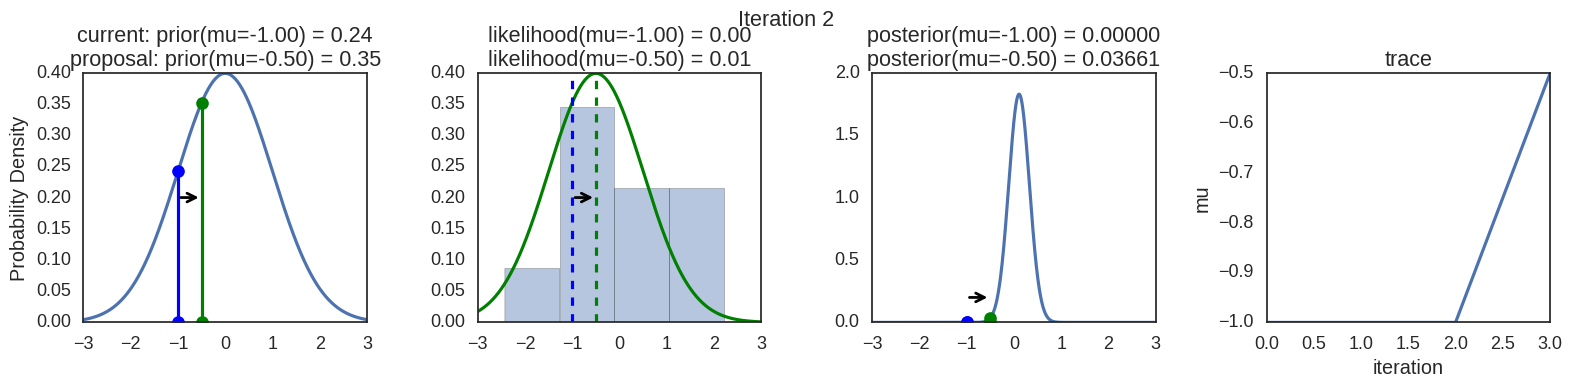

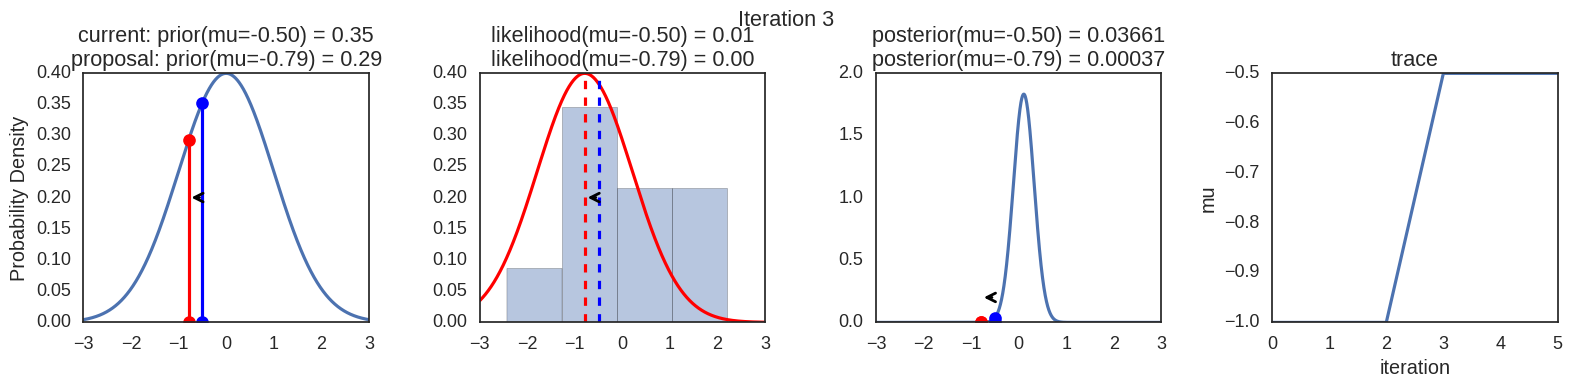

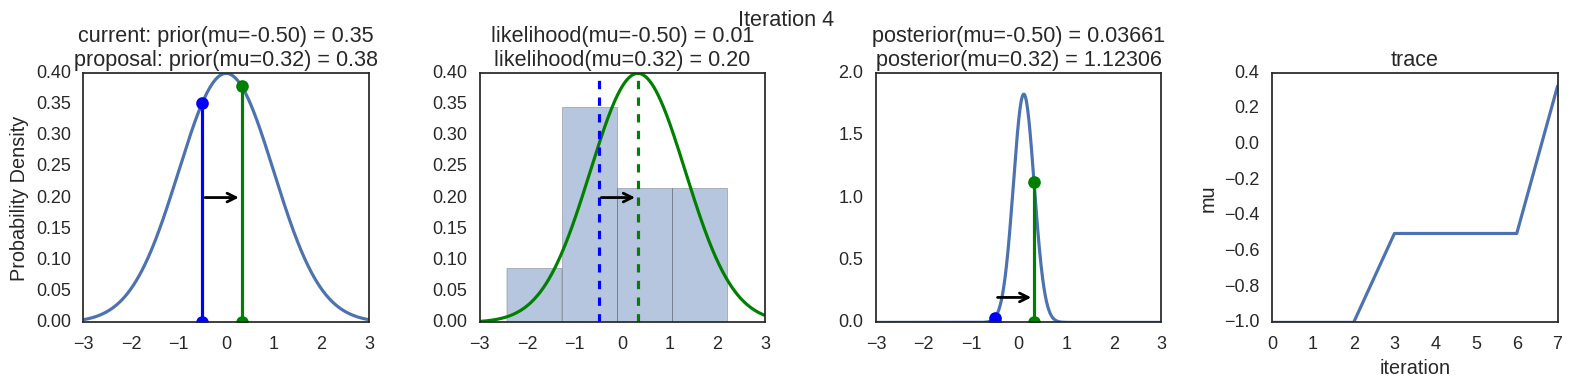

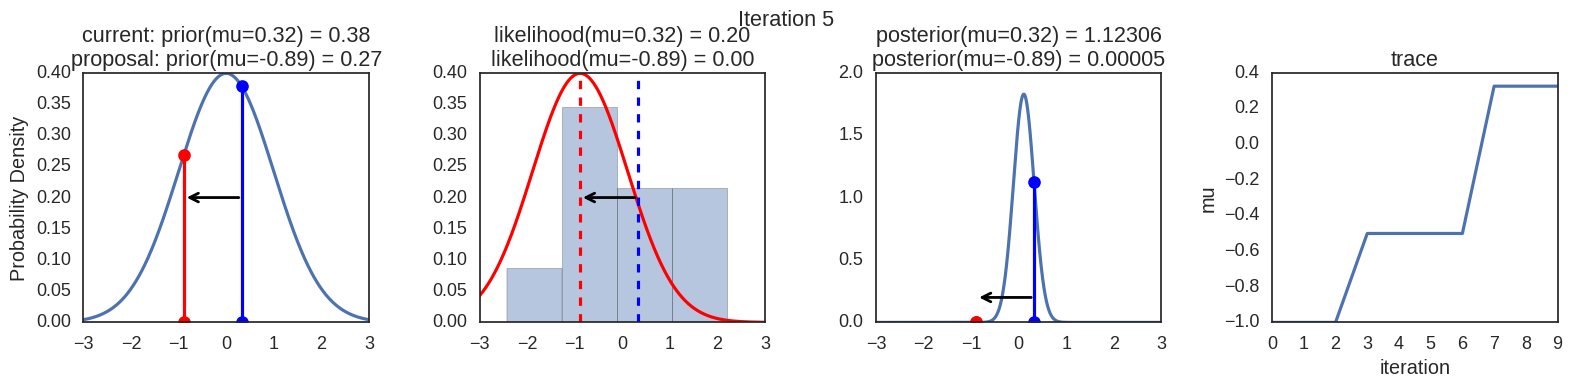

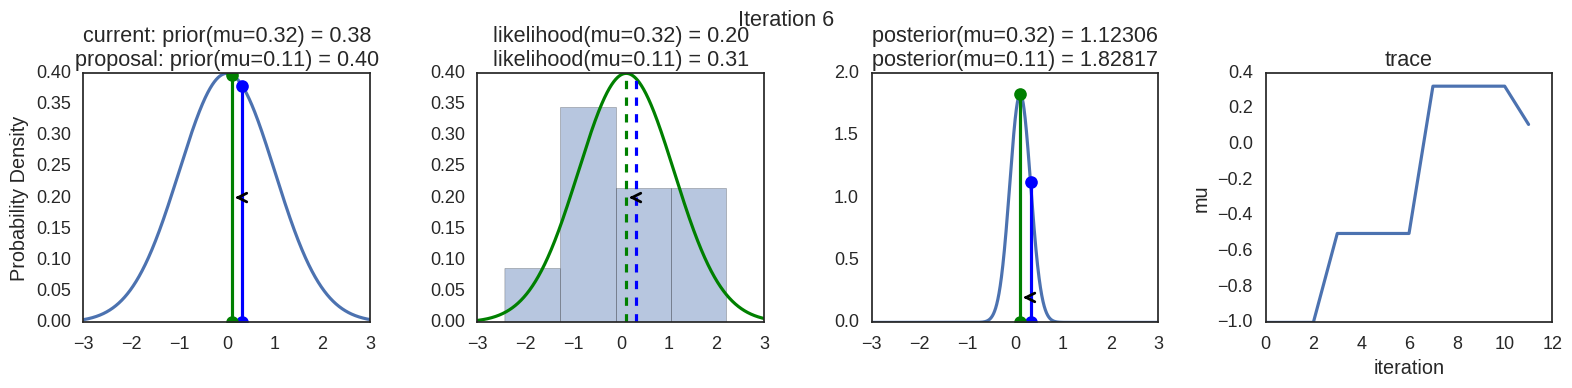

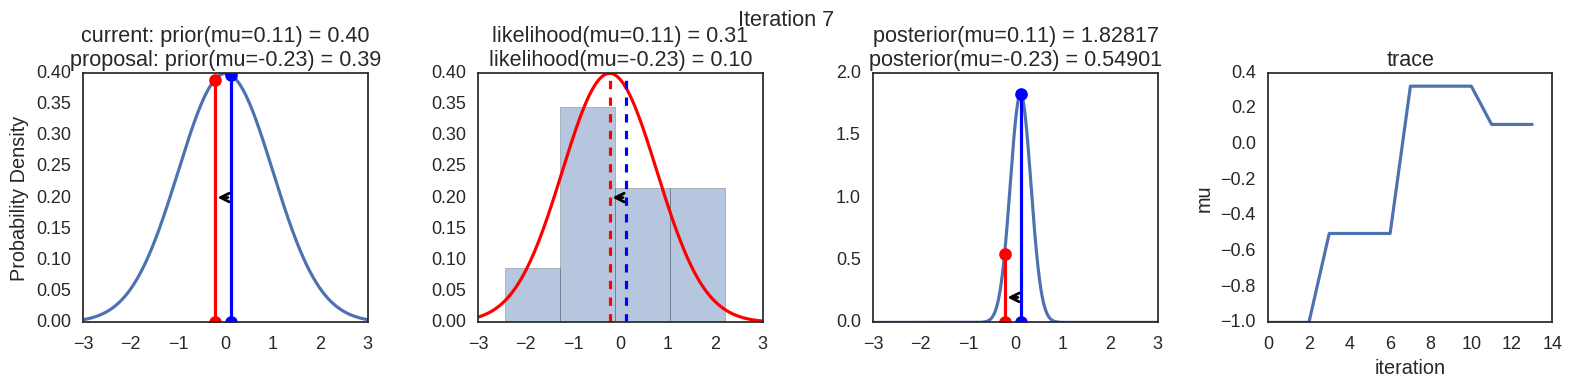

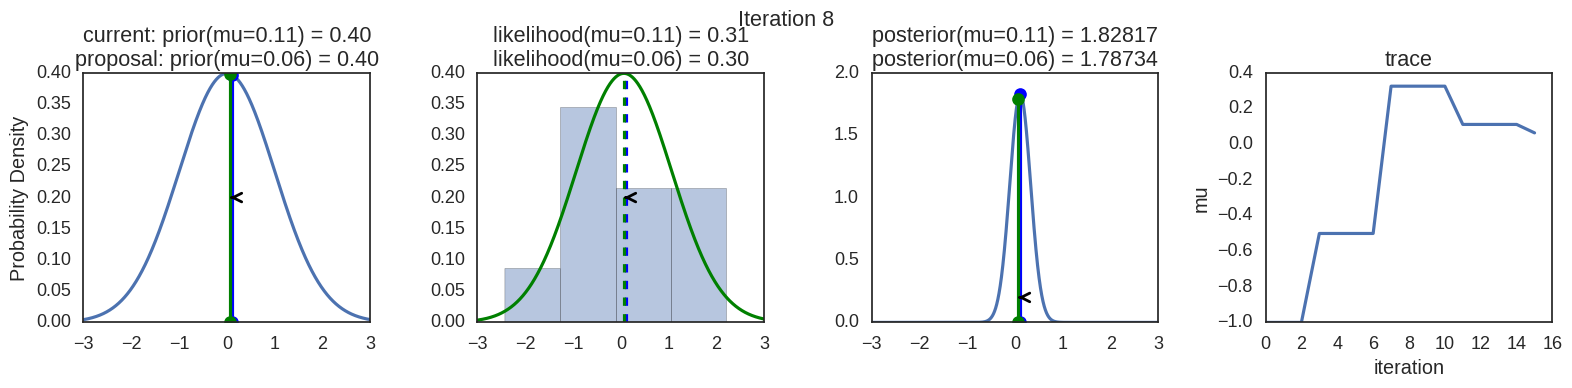

In [11]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

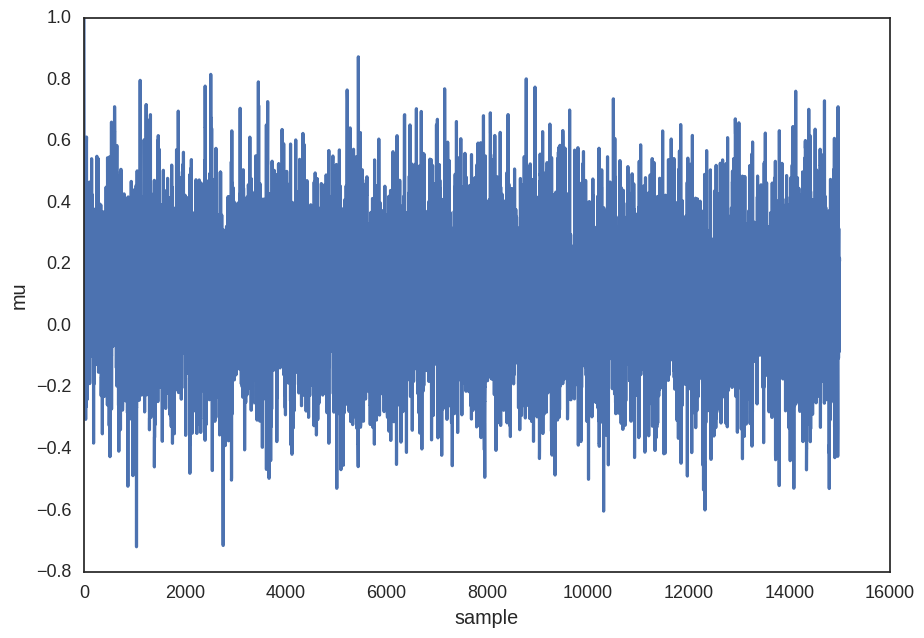

In [15]:
posterior = sampler(data, samples=15000, mu_init=1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

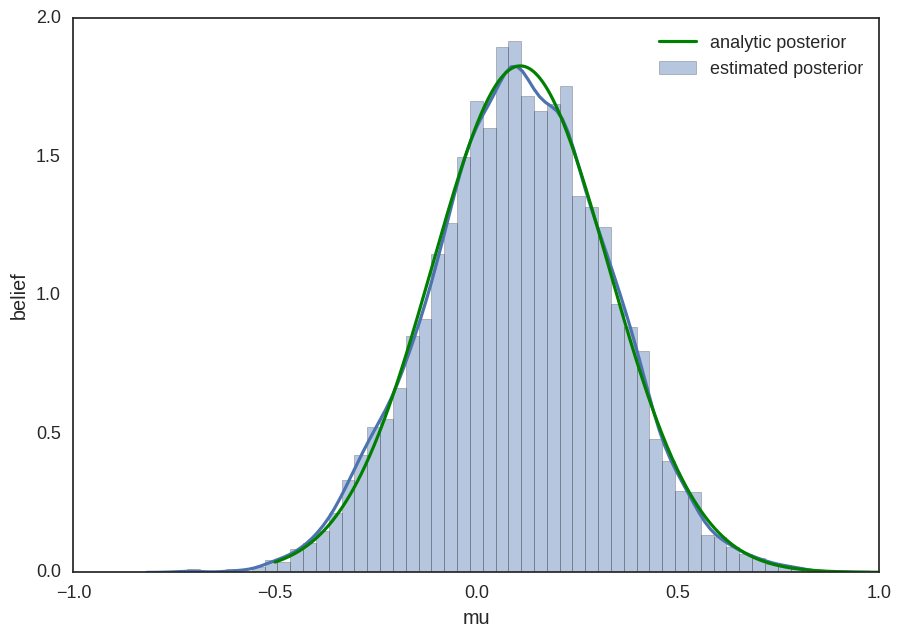

In [17]:
ax = plt.subplot()
sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(-.5, 1, 500)
post = calc_posterior_analytical(data, x, 0, 1)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend();

## 2.6 PyMC3 A python package for posterior sampling

The above example illustrates the hand-written algorithm of MCMC (particularly the Metropolis algorithm). There are fancier MCMC methods that can be used. PyMC3, which is an open source python package incorporates a bunch of MCMC algorithms and automatically choose the best based on the problem. Next, we will see how example 8 can be solved using PyMC3. 

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 34.93:  33%|███▎      | 66296/200000 [00:03<00:05, 22422.20it/s]
Convergence archived at 68000
Interrupted at 68,000 [34%]: Average Loss = 34.98
 99%|█████████▊| 14810/15000 [00:03<00:00, 3799.08it/s]/home/rose/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/home/rose/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
100%|██████████| 15000/15000 [00:03<00:00, 3762.76it/s]


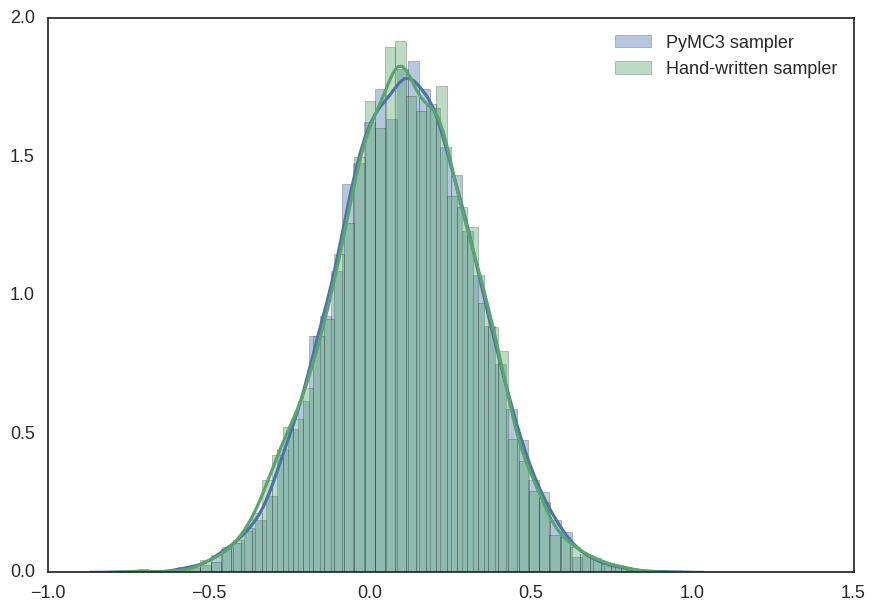

In [22]:
from pymc3 import Model
from pymc3 import Normal, Metropolis, sample
ex8 = Model()

with ex8:
    mu = Normal('mu', 0, 1)
    sigma = 1.
    returns = Normal('returns', mu=mu, sd=sigma, observed=data)
    step = Metropolis() # if this is not specified, PyMC3 will automatically assign a sampler to the problem
    trace = sample(15000, step)
    
sns.distplot(trace[2000:]['mu'], label='PyMC3 sampler');
sns.distplot(posterior[500:], label='Hand-written sampler');
plt.legend();

# 3. Differences between two schools of statistics

In most examples shown in this notebook, the priors are assumed to be known. However, in most of the real world problems, the prior is hardly known. Bayesians and frequentists differ in their treatment of the prior. 

The Bayesian school assumes a prior and models uncertainty by a probability distribution over hypotheses. One’s ability to make inferences depends on one’s degree of confidence in the chosen prior, and the robustness of the findings to alternate prior distributions may be relevant and important. In other words, as we have enough good data, the influence of the prior on the posterior can become insignificant. 

The frequentist approach does not depend on a subjective prior that may vary from one investigator to another. Frequentists only use conditional distributions of data given specific hypotheses (the likelihood). The presumption is that some hypothesis (parameter specifying the conditional distribution of the data) is true and that the observed data is sampled from that distribution. 

**Bayesian inference**
* uses probabilities for both hypotheses and data.
* depends on the prior and likelihood of observed data.
* requires one to know or construct a ‘subjective prior’.
* dominated statistical practice before the 20th century.
* may be computationally intensive due to integration over many parameters.


**Frequentist inference (NHST)**
* never uses or gives the probability of a hypothesis (no prior or posterior).
* depends on the likelihood P(D|H) for both observed and unobserved data.
* does not require a prior.
* dominated statistical practice during the 20th century.
* tends to be less computationally intensive.